## BAN620- Course Project: Online Shoppers' Intent

#### Team Members: Adriel Naranjo, Cheryl Che, Kim Thoa Le, Shu Rong Tay

### 1. Import required packages

In [1]:
# Install if necessary.
# !pip install pingouin
# !pip install graphviz

In [2]:
import graphviz
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import classificationSummary, liftChart
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import statsmodels.api as sm
%matplotlib inline   
import matplotlib.pylab as plt

### 2. Data exploration, cleaning and preprocessing

* Data exploration- Understanding what we are working with.

In [3]:
# Create a data frame in Python using .csv file.
try:
    eshoppers_df = pd.read_csv('online_shoppers_intention.csv')
except:
    print('online_shoppers_intention.csv is not in the present working directory')

In [4]:
# Determine and present the data frame dimensions, i.e., number of rows and columns.
print(f'The dimensions of the Online Shoppers dataset is {eshoppers_df.shape}')
print(f'{eshoppers_df.shape[0]} rows and {eshoppers_df.shape[1]} columns.')

The dimensions of the Online Shoppers dataset is (12330, 18)
12330 rows and 18 columns.


In [5]:
# Display the original column names.
print('Original columns for eshoppers_df:')
eshoppers_df.columns

Original columns for eshoppers_df:


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
# Display the first ten records of the shoppers_df data frame.
eshoppers_df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [7]:
# Identify vairable types, along with their information.
eshoppers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

* Data cleaning- Checking and removing duplicates.

In [8]:
dup_check = eshoppers_df.duplicated().sum()

# Check for duplicates
print('Number of duplicate entries:', dup_check)

if dup_check > 0:
    # Show duplicate rows
    duplicate_rows = eshoppers_df[eshoppers_df.duplicated(keep=False)]
    print()
    print('Sample duplicate entries:')
    print(duplicate_rows.head())

Number of duplicate entries: 125

Sample duplicate entries:
     Administrative  Administrative_Duration  Informational  \
85                0                      0.0              0   
132               0                      0.0              0   
158               0                      0.0              0   
159               0                      0.0              0   
178               0                      0.0              0   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
85                      0.0               1                      0.0   
132                     0.0               1                      0.0   
158                     0.0               1                      0.0   
159                     0.0               1                      0.0   
178                     0.0               1                      0.0   

     BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
85           0.2        0.2         0.0         0

In [9]:
# Remove duplicates, and show new data shape.
if dup_check > 0:
    eshoppers_df = eshoppers_df.drop_duplicates()
    print("Duplicates removed. New data shape:", eshoppers_df.shape)

Duplicates removed. New data shape: (12205, 18)


* Data cleaning- Checking and removing outliers.

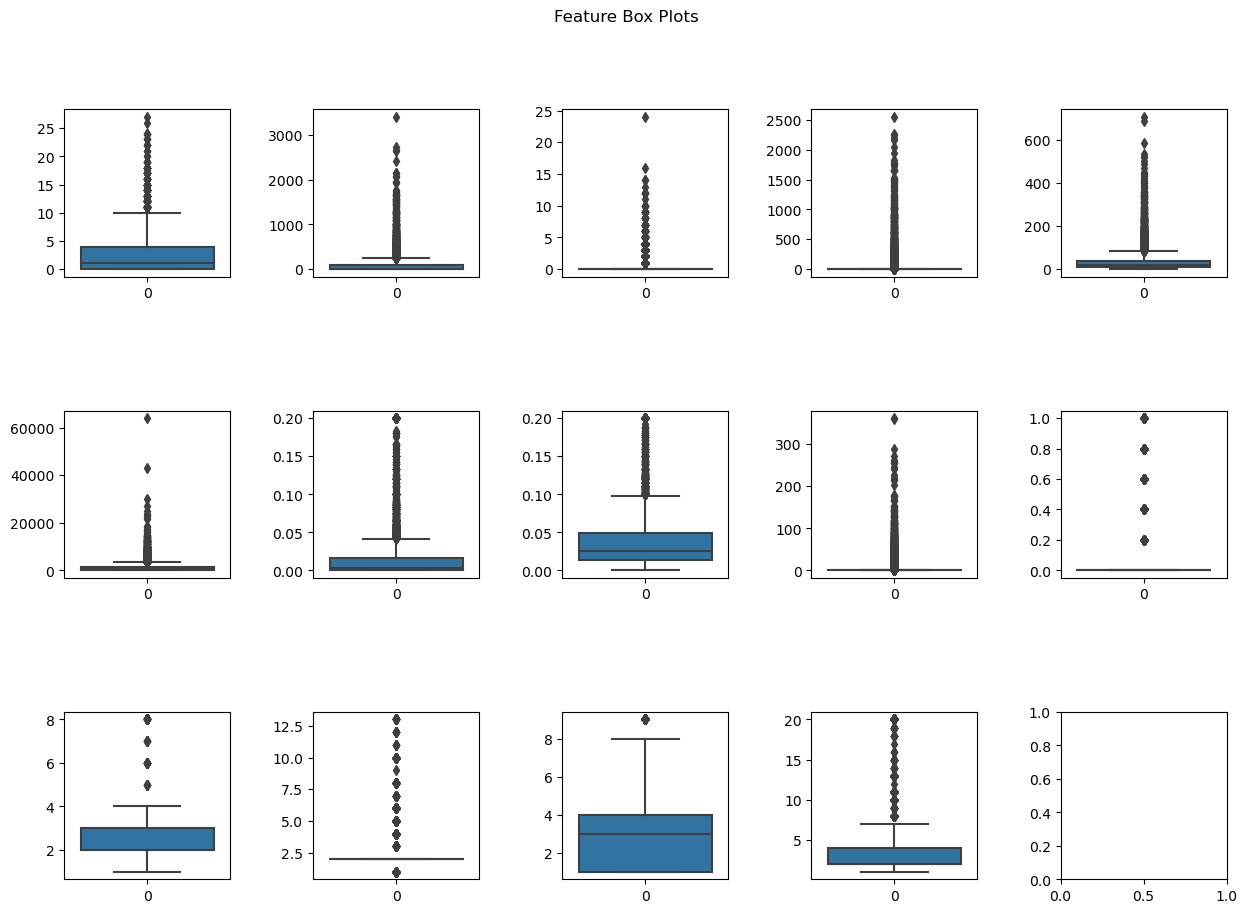

In [10]:
num_cols = list(eshoppers_df.select_dtypes(include='number').columns)
fig, axes = plt.subplots(3,5,figsize=(15,10))
plt.subplots_adjust(wspace=0.5, hspace=0.8)
axes = axes.flatten()

for i in range(len(num_cols)):
    sns.boxplot(eshoppers_df[num_cols[i]], ax=axes[i])
fig.suptitle('Feature Box Plots')
plt.show()

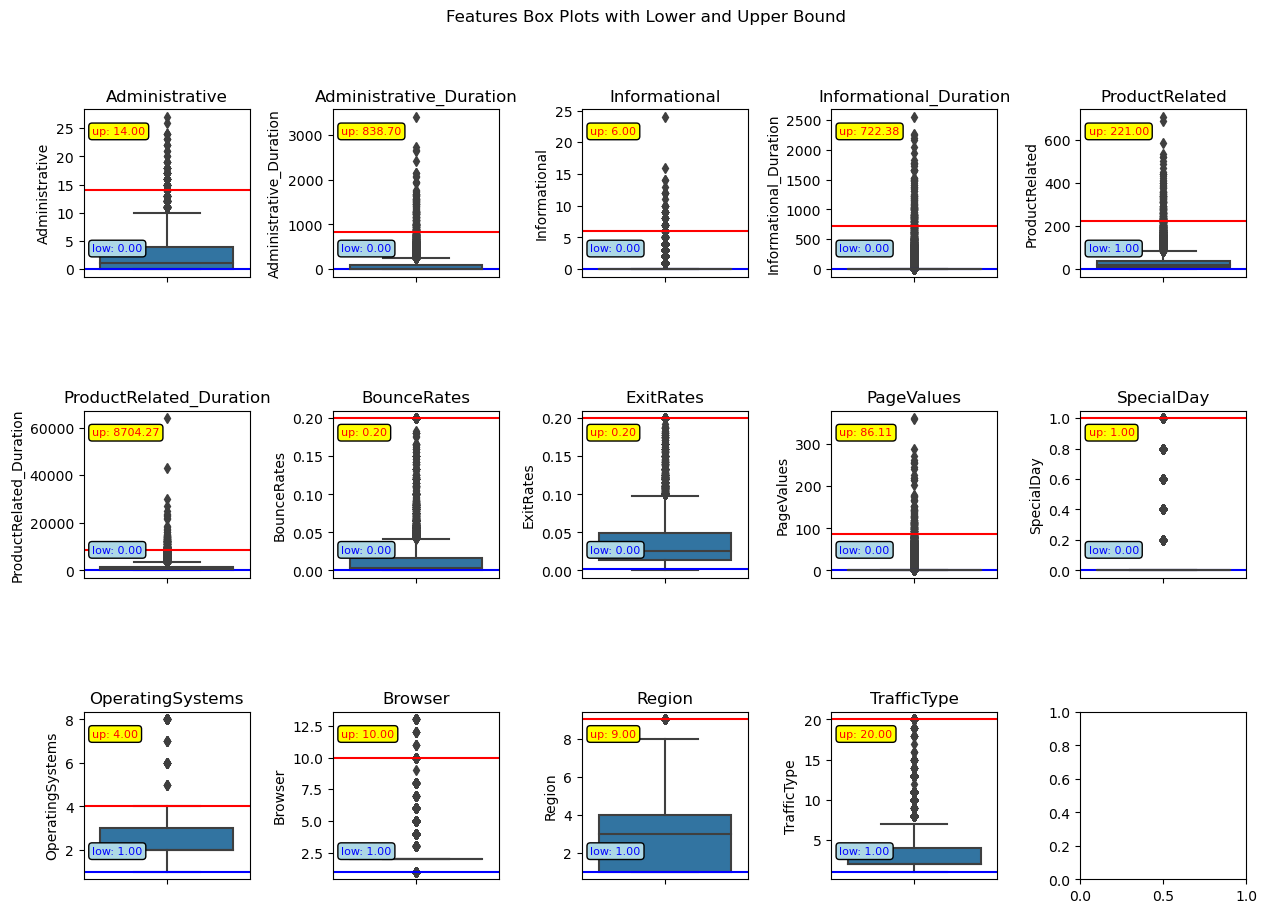

In [11]:
# Add lower and upper bound to check for outliers

p_up_v  = 0.99
p_low_v = 0.01

fig, axes = plt.subplots(3, 5, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.8)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=eshoppers_df[col], ax=axes[i])
    # Calculate the bound percentiles
    plow = eshoppers_df[col].quantile(p_low_v)
    pup = eshoppers_df[col].quantile(p_up_v)

    # Display lower line
    axes[i].axhline(y=plow, color='blue', linestyle='-')
    axes[i].annotate(f'low: {plow:.2f}', xy=(0.05, 0.15), xycoords='axes fraction', ha='left',
                     color='blue', fontsize=8, bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", ec="black", lw=1))

    # Display upper line
    axes[i].axhline(y=pup, color='red', linestyle='-')
    axes[i].annotate(f'up: {pup:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', ha='left',
                     color='red', fontsize=8, bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1))


    axes[i].set_title(col)

fig.suptitle('Features Box Plots with Lower and Upper Bound')
plt.show()

In [12]:
# Check for the number of outliers in the respective columns
columns_of_interest = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']

outlier_counts = {}

for col in columns_of_interest:
    # Calculate the bound percentiles
    plow = eshoppers_df[col].quantile(p_low_v)
    pup = eshoppers_df[col].quantile(p_up_v)

    # Count values lower and higher
    count_below_plow = (eshoppers_df[col] < plow).sum()
    count_above_pup = (eshoppers_df[col] > pup).sum()

    # show outliner columnss
    outliers_below_plow = eshoppers_df[eshoppers_df[col] < plow][[col]].head()
    outliers_above_pup = eshoppers_df[eshoppers_df[col] > pup][[col]].head()

    # Store results
    outlier_counts[col] = {
        'Lower Percentile': plow,
        'Count Below Percentile': count_below_plow,
        'Sample Outliers Below': outliers_below_plow,
        'Upper Percentile': pup,
        'Count Above Percentile': count_above_pup,
        'Sample Outliers Above': outliers_above_pup
         }

for col, stats in outlier_counts.items():
    print(f"Column: {col}")
    print()
    print(f"  Lower Percentile value ({stats['Lower Percentile']:.2f}): {stats['Count Below Percentile']} values below")
    print(f"  Sample Outliers Below Percentile:\n{stats['Sample Outliers Below']}")
    print()
    print(f"  Upper Percentile value ({stats['Upper Percentile']:.2f}): {stats['Count Above Percentile']} values above")
    print(f"  Sample Outliers Above Percentile:\n{stats['Sample Outliers Above']}")
    print("\n" + "-"*50 + "\n")

Column: Administrative

  Lower Percentile value (0.00): 0 values below
  Sample Outliers Below Percentile:
Empty DataFrame
Columns: [Administrative]
Index: []

  Upper Percentile value (14.00): 113 values above
  Sample Outliers Above Percentile:
     Administrative
248              16
502              18
611              16
641              17
704              19

--------------------------------------------------

Column: Administrative_Duration

  Lower Percentile value (0.00): 0 values below
  Sample Outliers Below Percentile:
Empty DataFrame
Columns: [Administrative_Duration]
Index: []

  Upper Percentile value (838.70): 123 values above
  Sample Outliers Above Percentile:
     Administrative_Duration
76               1005.666667
191              1226.000000
224               993.000000
257              1388.750000
282              1249.809524

--------------------------------------------------

Column: Informational

  Lower Percentile value (0.00): 0 values below
  Sample Outli

In [13]:
# Remove outliers.
for col in columns_of_interest:
    eshoppers_df = eshoppers_df[eshoppers_df[col] <= pup]
print("Outliers removed. New data shape:", eshoppers_df.shape)

Outliers removed. New data shape: (12082, 18)


* Data preprocessing- Changing object and boolean type variables to categorical, then dummy.

In [14]:
eshoppers_df.Month = eshoppers_df.Month.astype('category')
eshoppers_df.VisitorType = eshoppers_df.VisitorType.astype('category')
eshoppers_df.Weekend = eshoppers_df.Weekend.astype('category')
eshoppers_df.Revenue = eshoppers_df.Revenue.astype('category')
eshoppers_df = pd.get_dummies(eshoppers_df, prefix_sep='_', 
                            drop_first=True)

In [15]:
eshoppers_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_True', 'Revenue_True'],
      dtype='object')

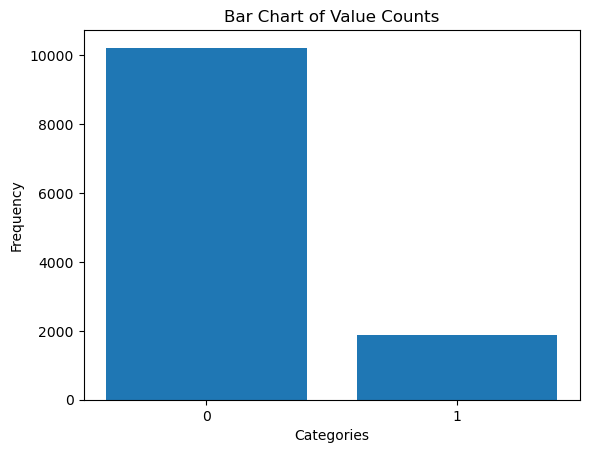

In [16]:
# Show class imbalance
plt.bar([0,1], eshoppers_df['Revenue_True'].value_counts().values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Chart of Value Counts')
plt.xticks(range(len(eshoppers_df['Revenue_True'].value_counts())), ['0', '1'])  
plt.show()

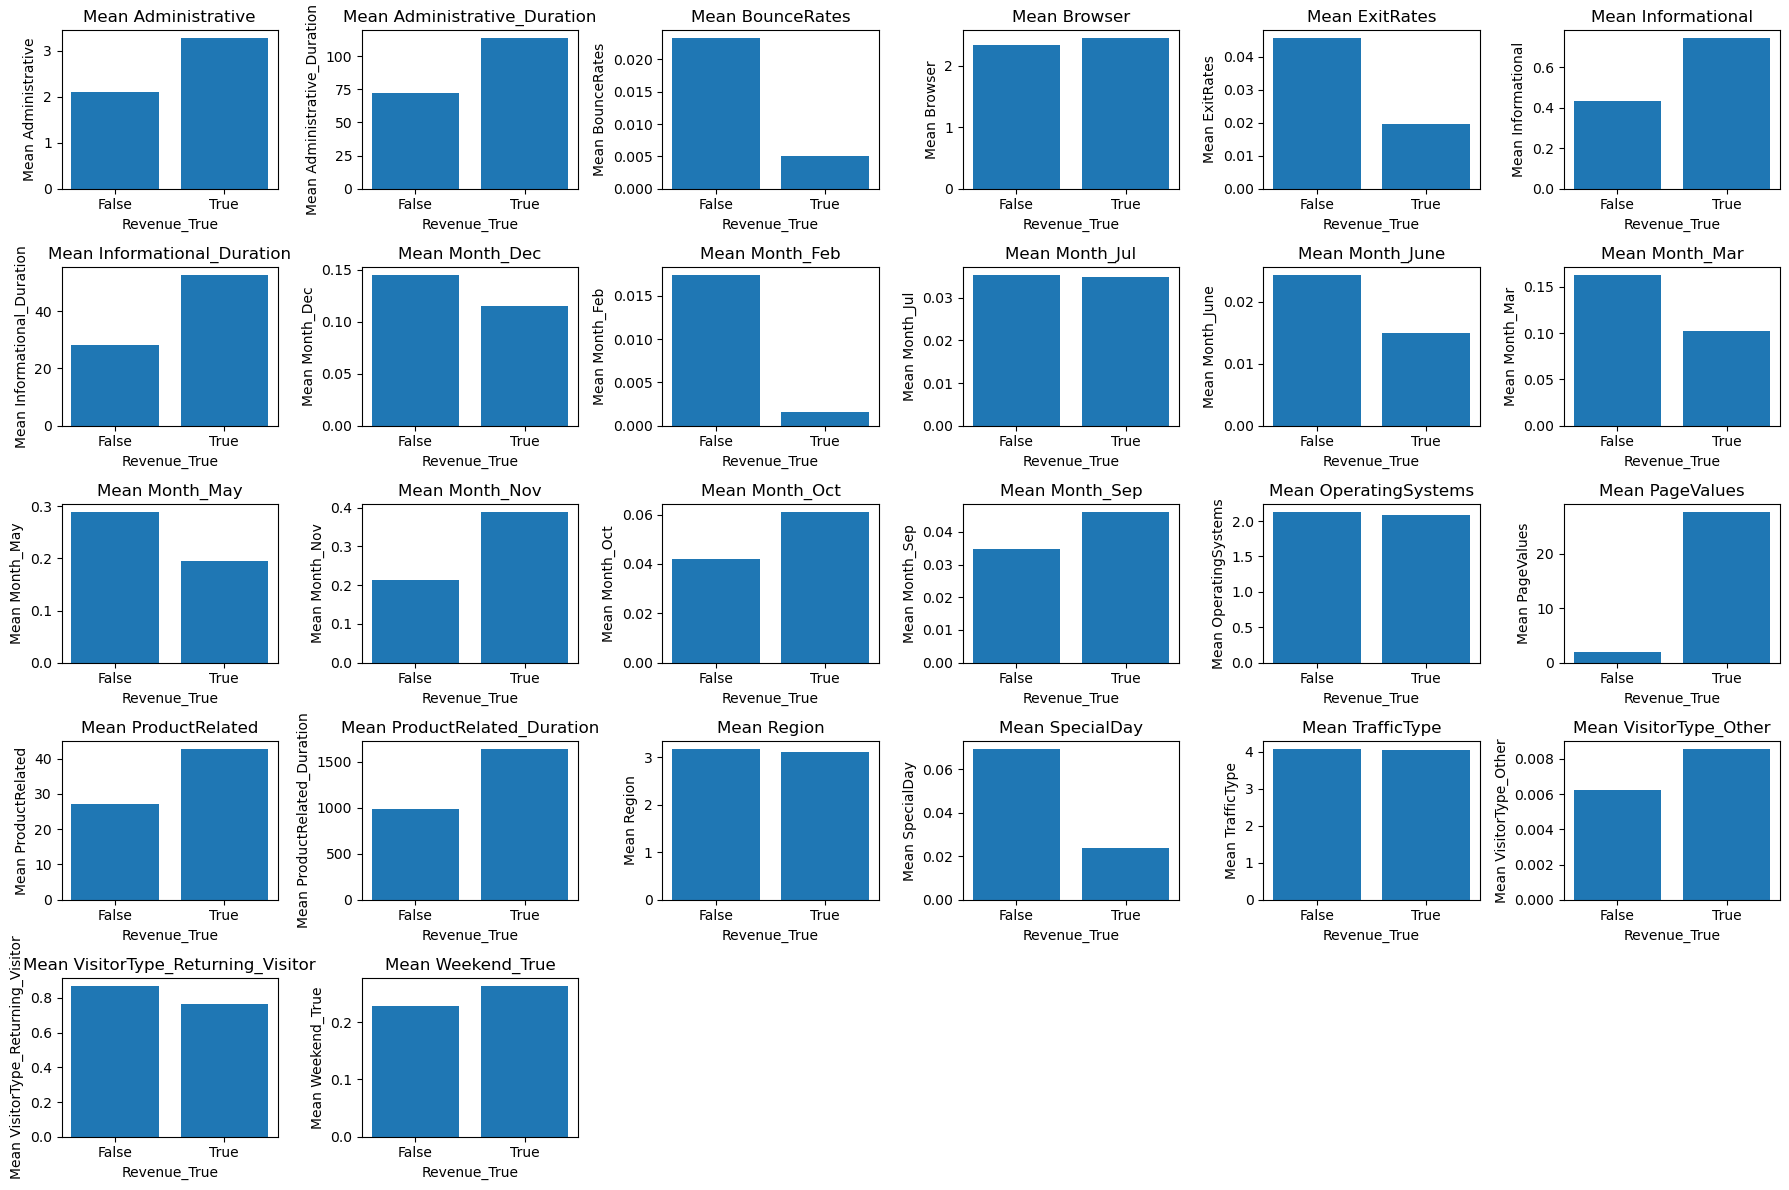

In [17]:
# ?
pivot_table = eshoppers_df.pivot_table(index='Revenue_True', 
                               values=['Administrative', 'Administrative_Duration', 'Informational',
                                        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                                        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                                        'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Dec',
                                        'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
                                        'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
                                        'VisitorType_Returning_Visitor', 'Weekend_True'], 
                               aggfunc='mean')

fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column in the pivot table and create a bar plot
for i, column in enumerate(pivot_table.columns):
    ax = axes[i]
    ax.bar(pivot_table.index, pivot_table[column])
    ax.set_title(f'Mean {column}')
    ax.set_xlabel('Revenue_True')
    ax.set_ylabel(f'Mean {column}')
    ax.set_xticks(pivot_table.index)
    ax.set_xticklabels(['False', 'True'])

# Hide empty subplots
for j in range(len(pivot_table.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### 3. Develop and run classification tree for online shoppers intent data using multiple predictors.

In [18]:
# Create predictors X and outcome y variables.
predictors = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_True']
target = 'Revenue_True'

In [19]:
X = eshoppers_df[predictors]
y = eshoppers_df[target]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
# Create classification tree after 5 splits.
classTree = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001, min_samples_split=10)
classTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001,
                       min_samples_split=10)

Full Classification Tree after All Splits


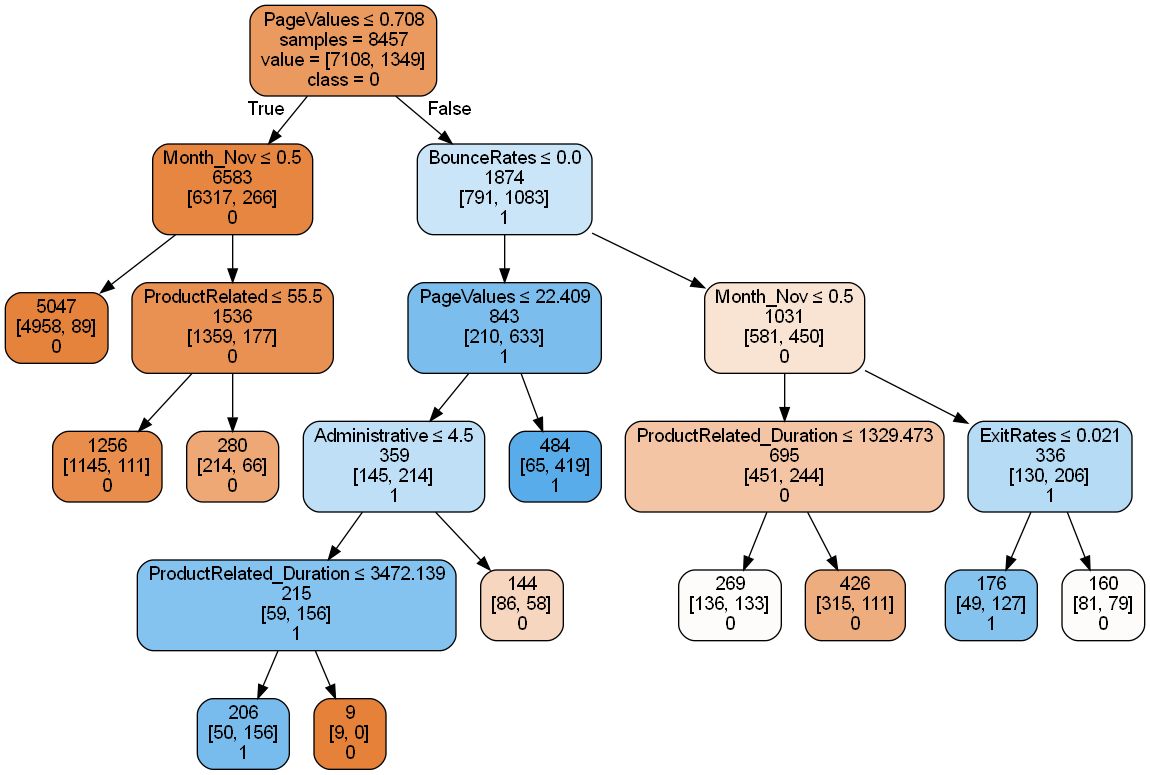

In [21]:
# Display tree.
print('Full Classification Tree after All Splits')
plotDecisionTree(classTree, feature_names=X.columns, class_names=classTree.classes_)

In [22]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, classTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, classTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9041)

       Prediction
Actual    0    1
     0 6944  164
     1  647  702

Validation Partition
Confusion Matrix (Accuracy 0.9054)

       Prediction
Actual    0    1
     0 3023   85
     1  258  259


* Grid search for classification tree.

In [23]:
# Start with initial guess for parameters.
param_grid = {
    'max_depth': list(range(2, 26)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5, 21)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() initial parameters. cv=5 means that
# 5-fold cross-validation is used in this case, and n_jobs=-1 
# means that the availalbe computer memory (CPU) will be 
# used to make calculations faster. 
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)

gridSearch_init.fit(train_X, train_y)

# Display best initial paramenters of classification tree. 
print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.8997
Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.0005, 'min_samples_split': 5}


In [24]:
# Create classification tree based on the improved parameters.
optTree = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.0005, min_samples_split=5)
optTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.0005,
                       min_samples_split=5)

Full Classification Tree after All Splits


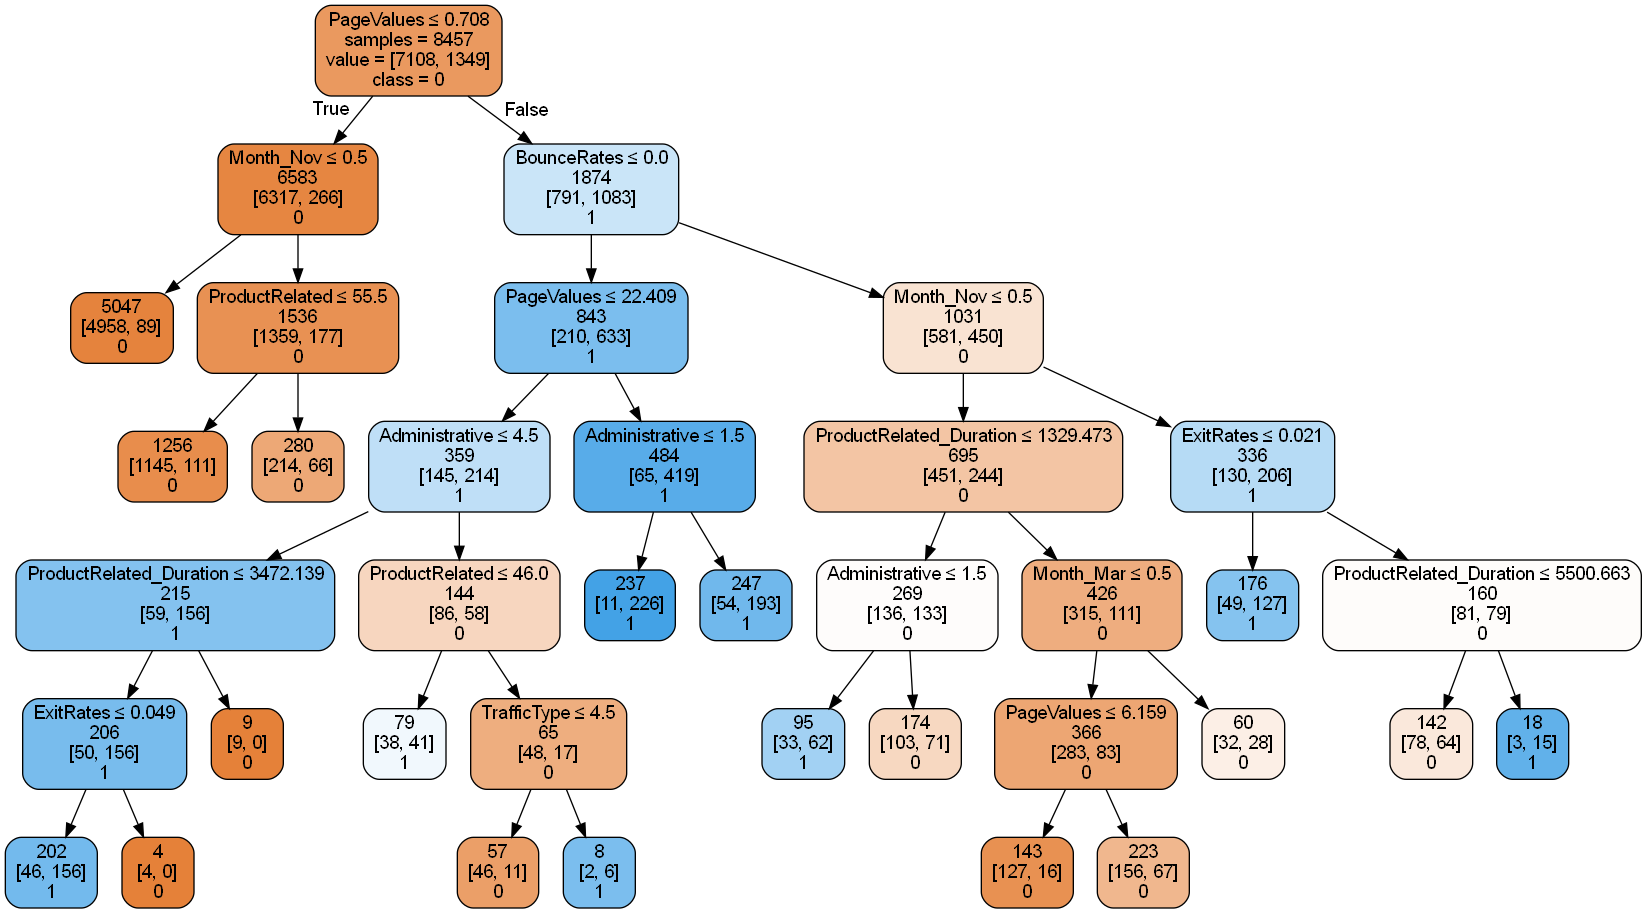

In [25]:
print('Full Classification Tree after All Splits')
plotDecisionTree(optTree, feature_names=X.columns, class_names=classTree.classes_)

In [26]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, optTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, optTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9103)

       Prediction
Actual    0    1
     0 6872  236
     1  523  826

Validation Partition
Confusion Matrix (Accuracy 0.9040)

       Prediction
Actual    0    1
     0 2978  130
     1  218  299


#### 3a. Classification tree with cluster analysis for feature selection

In [27]:
eshoppers_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_True', 'Revenue_True'],
      dtype='object')

In [28]:
eshoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [29]:
eshoppers_df['TrafficType'].value_counts()

2     3850
1     2363
3     2002
4     1062
13     720
10     448
6      442
8      340
5      257
11     245
20     192
9       41
7       40
15      37
19      16
14      12
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [30]:
df_copy = eshoppers_df.copy()

columns_to_normalize = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']  

# Select the subset of data
subset_df = df_copy[columns_to_normalize]

# Perform normalization on the subset
subset_df_norm = (subset_df - subset_df.min()) / (subset_df.max() - subset_df.min())

# Update the subset of the original DataFrame with the normalized values
df_copy[columns_to_normalize] = subset_df_norm

In [31]:
df_copy['TrafficType'].value_counts()

0.052632    3850
0.000000    2363
0.105263    2002
0.157895    1062
0.631579     720
0.473684     448
0.263158     442
0.368421     340
0.210526     257
0.526316     245
1.000000     192
0.421053      41
0.315789      40
0.736842      37
0.947368      16
0.684211      12
0.894737      10
0.789474       3
0.578947       1
0.842105       1
Name: TrafficType, dtype: int64

In [32]:
# eshoppers_df_norm = (eshoppers_df - eshoppers_df.mean())/eshoppers_df.std()

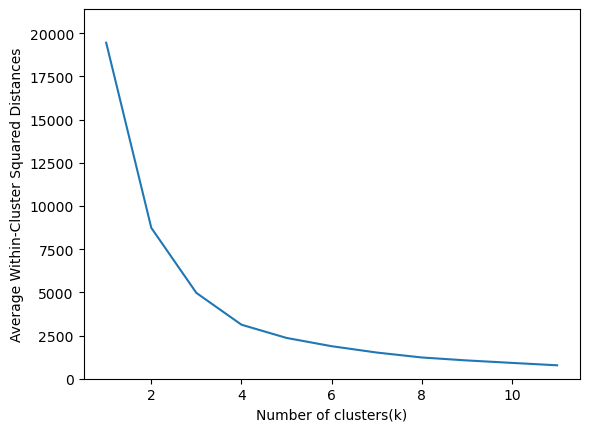

In [33]:
from sklearn.cluster import KMeans
 
inertia = []
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=1).fit(df_copy)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 12), 'inertia': inertia})

ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [34]:
from sklearn.cluster import KMeans

k = 7
X_norm = df_copy[df_copy.columns]
y = df_copy[target]

kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X_norm)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df_copy['cluster'] = cluster_labels

# Now, for each cluster, you can identify the most representative features
# For example, you can calculate the mean value of each feature within each cluster
cluster_means = df_copy.groupby('cluster').mean()

# Select the most representative features from each cluster
selected_features = []
for cluster in range(k):
    # Select the features with the highest mean value within each cluster
    cluster_features = cluster_means.loc[cluster].idxmax()
    selected_features.append(cluster_features)

selected_features = list(set(selected_features))
# Now 'selected_features' contains the most representative feature from each cluster
print("Selected Features:", selected_features)

Selected Features: ['Month_May', 'VisitorType_Returning_Visitor', 'Month_Mar', 'Weekend_True', 'Month_Nov', 'Month_Dec', 'Month_Oct']


In [35]:
target = 'Revenue_True'

In [36]:
X = eshoppers_df[selected_features]
y = eshoppers_df[target]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
# Display size of training and validation partitions.
print("Training data shape:", train_X.shape)
print("Validation data shape:", valid_X.shape)

Training data shape: (8457, 7)
Validation data shape: (3625, 7)


In [38]:
# Start with initial guess for parameters.
param_grid = {
    'max_depth': list(range(2, 26)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5, 21)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() initial parameters. cv=5 means that
# 5-fold cross-validation is used in this case, and n_jobs=-1 
# means that the availalbe computer memory (CPU) will be 
# used to make calculations faster. 
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)

gridSearch_init.fit(train_X, train_y)

# Display best initial paramenters of classification tree. 
print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.8405
Initial parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 5}


In [39]:
optTree = DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.0000, min_samples_split=5)
optTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=2, min_samples_split=5)

Full Classification Tree after All Splits


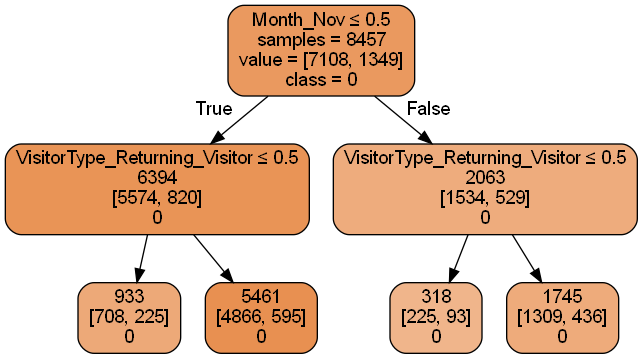

In [40]:
print('Full Classification Tree after All Splits')
plotDecisionTree(optTree, feature_names=X.columns, class_names=classTree.classes_)

In [41]:
# Confusion matrices for classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, optTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, optTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8405)

       Prediction
Actual    0    1
     0 7108    0
     1 1349    0

Validation Partition
Confusion Matrix (Accuracy 0.8574)

       Prediction
Actual    0    1
     0 3108    0
     1  517    0


Information Loss: K-means feature selection may lead to information loss, as it selects features based on their mean values 
within clusters, potentially disregarding important patterns or variability in the data. It's possible that the discarded 
features contain valuable information that contributes to the predictive performance of the classification tree.

Relevance of Features: K-means feature selection might not accurately capture the relevance of features for the classification 
task. It selects features based on their means within clusters, which may not necessarily correlate with their importance for 
predicting the target variable.

Curse of Dimensionality: K-means clustering, especially with a large number of features, can suffer from the curse of 
dimensionality, where the effectiveness of clustering decreases as the dimensionality of the feature space increases. 
In high-dimensional spaces, the clusters formed by k-means may become less meaningful, leading to suboptimal feature selection.

Model Complexity: The classification tree using all features may have higher complexity compared to the one using 
k-means-selected features. A more complex model can capture more intricate patterns in the data but is also prone to 
overfitting, especially when the dataset is relatively small compared to the number of features.

Interaction Effects: The discarded features in the k-means-selected set may capture interaction effects or nonlinear 
relationships with the target variable that are not adequately represented by the selected features. Interaction effects 
can be important for classification tasks and may not be captured by simple feature selection methods like k-means.

In [42]:
X = eshoppers_df[predictors]
y = eshoppers_df[target]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

param_grid = {
    'max_depth': list(range(2, 7)),
    'min_impurity_decrease': [ 0.0005,0.001,0.0015,0.002],
    'min_samples_split': list(range(25, 50)),
    'class_weight': ['balanced']
}

gridSearch = GridSearchCV(DecisionTreeClassifier(),
                   param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)

Improved score:0.8738
Improved parameters:  {'class_weight': 'balanced', 'max_depth': 2, 'min_impurity_decrease': 0.0005, 'min_samples_split': 25}


Best Classification Tree with Grid Search


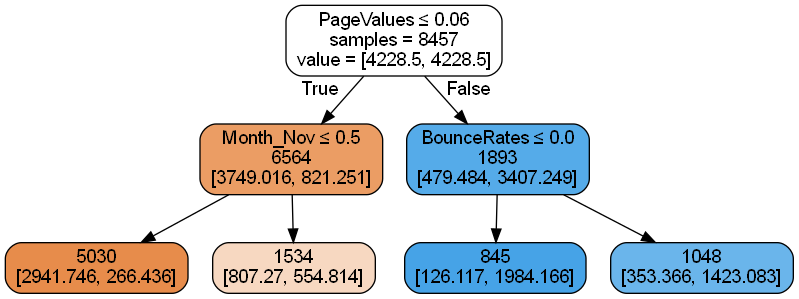

In [43]:
# Create classification tree based on the improved parameters.
balancedClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters.
print('Best Classification Tree with Grid Search')
plotDecisionTree(balancedClassTree, feature_names=train_X.columns)

In [44]:
balancedTree = DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.0005, min_samples_split=25, class_weight='balanced')

Best Classification Tree with Grid Search


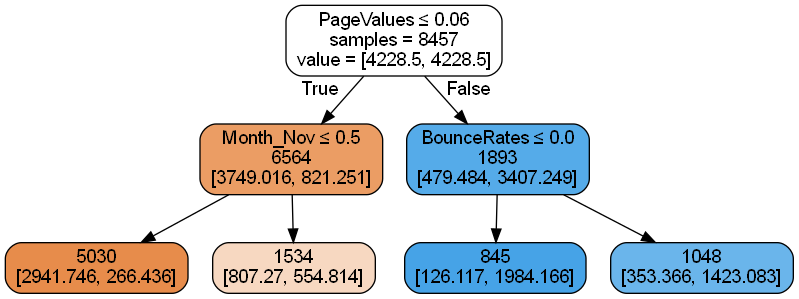

In [45]:
balancedClassTree = gridSearch.best_estimator_
balancedTree.fit(train_X, train_y)
# Display classification tree based on improved parameters.
print('Best Classification Tree with Grid Search')
plotDecisionTree(balancedTree, feature_names=train_X.columns)

In [46]:
# Confusion matrices for grid search classification tree. 

print('Training Partition')
classificationSummary(train_y, balancedTree.predict(train_X))

# Identify and display confusion matrix for validation partition.
print()
print('Validation Partition')
classificationSummary(valid_y, balancedTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8737)

       Prediction
Actual    0    1
     0 6302  806
     1  262 1087

Validation Partition
Confusion Matrix (Accuracy 0.8761)

       Prediction
Actual    0    1
     0 2759  349
     1  100  417


### 4. Develop and run logistic regression using multiple predictors.

In [56]:
# Create predictors X and outcome y variables.
X = eshoppers_df[predictors]
y = eshoppers_df[target]

# Partition data into training (70% or 0.7) and validation(30% or 0.3)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.3, random_state=1)

log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
pd.set_option('display.max_columns', None)
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)},
                    index=X.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -1.937
Coefficients for Predictors
        Administrative  Administrative_Duration  Informational  \
Coeff:          -0.002                      0.0         -0.044   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
Coeff:                     0.0           0.001                      0.0   

        BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
Coeff:       -3.079     -4.083       0.081      -0.487            -0.046   

        Browser  Region  TrafficType  Month_Dec  Month_Feb  Month_Jul  \
Coeff:    0.025   0.006        0.002     -0.661     -1.629     -0.048   

        Month_June  Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  \
Coeff:      -0.269     -0.525     -0.482      0.472       0.04      0.072   

        VisitorType_Other  VisitorType_Returning_Visitor  Weekend_True  
Coeff:             -0.524                         -0.522         0.177  


In [57]:
# Make predictions for validation set using multiple
# predictors logistic regression model.

# Predict multiple predictors logistic model's results
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set.
log_result = pd.DataFrame({'Actual': valid_y,
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(25))

Classification for Validation Partition
       Actual  Classification    p(0)    p(1)
10443       0               0  0.9769  0.0231
5384        0               0  0.9609  0.0391
338         0               0  0.9571  0.0429
8181        0               0  0.9378  0.0622
35          0               0  0.9773  0.0227
2263        0               0  0.9872  0.0128
7107        0               0  0.9051  0.0949
9453        0               0  0.9561  0.0439
730         0               0  0.9457  0.0543
348         0               0  0.8945  0.1055
5611        0               0  0.9478  0.0522
1993        0               0  0.9856  0.0144
135         0               0  0.9859  0.0141
12110       0               0  0.8809  0.1191
3162        0               0  0.8559  0.1441
7027        0               0  0.8509  0.1491
8797        0               0  0.9416  0.0584
10212       0               0  0.9387  0.0613
777         0               0  0.8661  0.1339
6352        0               0  0.9681  0

In [58]:
# Confusion matrices for multiple predictors logistic model.

# Identify and display confusion matrix for training partition.
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition.
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8812)

       Prediction
Actual    0    1
     0 6945  163
     1  842  507

Validation Partition
Confusion Matrix (Accuracy 0.8930)

       Prediction
Actual    0    1
     0 3038   70
     1  318  199


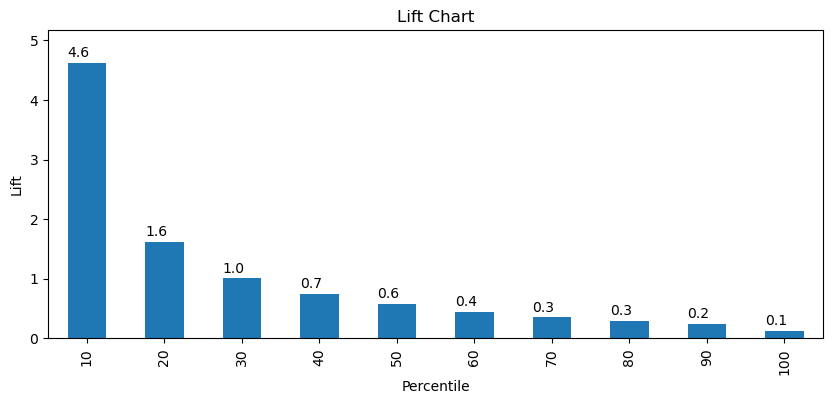

In [59]:
df = log_result.sort_values(by=['p(1)'], ascending=False)

# Create a data plot with a single plot (ncols=2)
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

# Using liftChart() function, create decile-wise Lift chart.
# In this Lift chart, taking the 10% of the records
# that are ranked by the model as 'most probable 0's'
# yields 4.5 times as many '1's (Revenue produced )as would simply
# selecting 10% of the records at random.
liftChart(df['p(1)'], title='Lift Chart')

# Display the charts.
# plt.tight_layout()
plt.show()

In [60]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function.
def train_model(variables):
    model = LogisticRegression(max_iter= 6000)
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function.
def score_model(model, variables):
    y_pred = model.predict(train_X[variables])
    # Convert boolean arrays to integers
    y_true_int = train_y.astype(int)
    y_pred_int = y_pred.astype(int)
    return AIC_score(y_true_int, y_pred_int, model)

# Use backward_elimination() function to identify the
# best_model and best_variables.
best_model_be, best_variables_be = backward_elimination(train_X.columns,
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm.
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, TrafficType, Month_Dec, Month_Feb, Month_Jul, Month_June, Month_Mar, Month_May, Month_Nov, Month_Oct, Month_Sep, VisitorType_Other, VisitorType_Returning_Visitor, Weekend_True
Start: score=6026.05


C:\Users\naran\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Step: score=5958.73, remove Month_Feb
Step: score=5958.73, remove None

Best Variables from Backward Elimination Algorithm
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Dec', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_True']


In [61]:
predictors_be = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated_Duration', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_True']
outcome = target

# Identify X and y variables for logistic regression and partition data
# using 70% of records for training and 30% for validation
# (test_size=0.3).
X = eshoppers_df[predictors_be]
y = eshoppers_df[outcome]
train_X_be, valid_X_be, train_y_be, valid_y_be = \
          train_test_split(X, y, test_size=0.3, random_state=1)

# Create logistic regression model using X and y.
shoppers_be = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
shoppers_be.fit(train_X_be, train_y_be)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(shoppers_be.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(shoppers_be.coef_[0], decimals=3)},
                    index=X.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -2.051
Coefficients for Predictors
        Administrative  Administrative_Duration  Informational  \
Coeff:           0.007                      0.0         -0.039   

        Informational_Duration  ProductRelated_Duration  ExitRates  \
Coeff:                     0.0                      0.0     -2.042   

        PageValues  SpecialDay  OperatingSystems  Browser  Region  \
Coeff:       0.083      -0.557            -0.044    0.023   0.007   

        TrafficType  Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  \
Coeff:          0.0      -0.74     -1.158     -0.029      -0.306     -0.599   

        Month_May  Month_Nov  Month_Sep  VisitorType_Other  \
Coeff:     -0.473      0.428      0.072             -0.361   

        VisitorType_Returning_Visitor  Weekend_True  
Coeff:                         -0.531         0.231  


In [62]:
# Confusion matrices for multiple predictors logistic model.

# Identify and display confusion matrix for training partition.
print('Training Partition for Logistic Model Based On Backward Elimination')
classificationSummary(train_y_be, shoppers_be.predict(train_X_be))

# Identify and display confusion matrix for validation partition.
print()
print('Validation Partition for Logistic Model Based On Backward Elimination')
classificationSummary(valid_y_be, shoppers_be.predict(valid_X_be))

Training Partition for Logistic Model Based On Backward Elimination
Confusion Matrix (Accuracy 0.8806)

       Prediction
Actual    0    1
     0 6943  165
     1  845  504

Validation Partition for Logistic Model Based On Backward Elimination
Confusion Matrix (Accuracy 0.8919)

       Prediction
Actual    0    1
     0 3035   73
     1  319  198
